# Assingment 3
#### Data Analysis Oceanographic & Larval Fish Data
- Name: Bima Aristo
- NPM: 2106723874

## Problem & Goals

Problems: 
- Analyze the Dataset of Oceanographic & Larval Fish Data and find the relation (minimum) of two parameters in the data. 

Goals of the assignment 3: 

- Understand the concept of types of machine learning algorithms specifically on the Supervised Learning (Regression/Classifications) 
- Understanding how to do data analysis using Python: Data Wrangling, Data Cleaning, Exploratory Data Analysis, and Data Visualization 

# Prepare the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

##### gather the data of bottle.csv

In [3]:
df = pd.read_csv("bottle.csv", delimiter=",")
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\1270652672.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bottle.csv", delimiter=",")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
print("Total Duplicates: ",df.duplicated().sum())
df.describe()

Total Duplicates:  0


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


### Assessing Data

##### check the data of day and hour

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

### Cleaning Data

##### Menghapus data yang tidak ada korelasinya dengan pertanyaan bisnis
1. Menghapus tabel dengan nilai NaN

In [8]:
df.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment


In [14]:
df.fillna(method='ffill', inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\518992900.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace = True)


## Exploratory Data Analysis (EDA)

#### Explore the Data
1. Group the data by the atribute we want to analyze

In [16]:
df_binary = df[[ 'Depthm', 'T_degC']]
df_binary.columns = ['Depth',  'Temp']
df_binary.head(20)

,Depth,Temp
0,0,10.50
1,8,10.46
2,10,10.46
3,19,10.45
4,20,10.45
5,30,10.45
6,39,10.45
7,50,10.24
8,58,10.06
9,75,9.86


## Visualization & Explanatory Analysis

### Questions based on the problem: Whats the relationhip between the depth and temperature from the oceanographic & larval fish data

Text(0, 0.5, 'Temp')

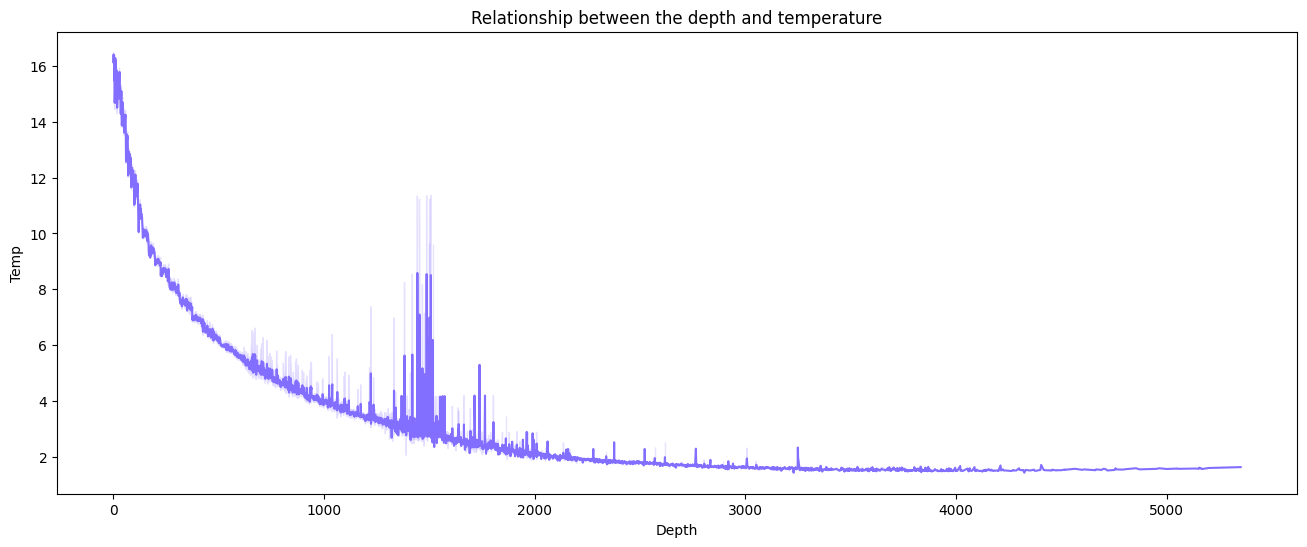

In [33]:
plt.figure(figsize=(16,6))

sns.lineplot(x="Depth", y="Temp", data=df_binary, color='#836FFF')

plt.title("Relationship between the depth and temperature")
plt.xlabel("Depth")
plt.ylabel("Temp")


d:\Files\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

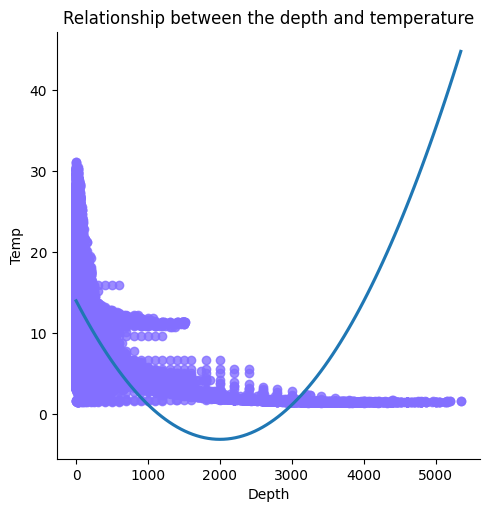

In [35]:
plt.figure(figsize=(16,6))

sns.lmplot(x="Depth", y="Temp", data=df_binary, scatter_kws={"color": '#836FFF'}, order=2, ci=None)

plt.title("Relationship between the depth and temperature")
plt.xlabel("Depth")
plt.ylabel("Temp")

plt.show()

In [39]:
X = np.array(df_binary['Depth']).reshape(-1,1)
y = np.array(df_binary['Temp']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4576608794341006


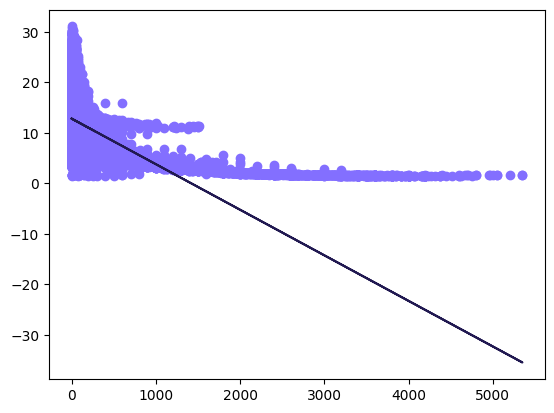

In [41]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='#836FFF' )
plt.plot(X_test, y_pred,  color ='#211951')
plt.show()

#tapi hasilnya mmasih belum fit dengan baik

d:\Files\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


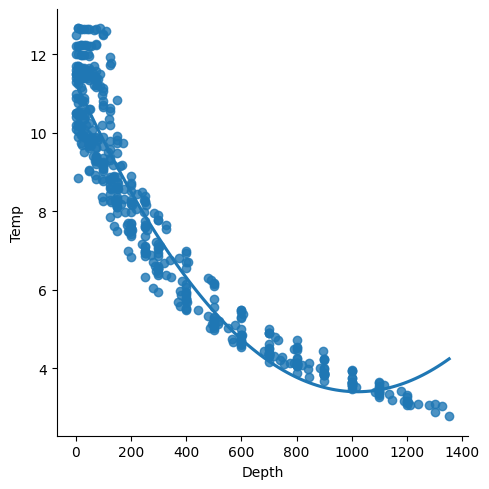

In [43]:
df_binary500 = df_binary[:][:500 ]# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Depth", y ="Temp", data = df_binary500, order = 2, ci = None)

In [45]:
X = np.array(df_binary500['Depth']). reshape(-1,  1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit (X_train, y_train)
print(regr.score(X_test, y_test))

0.8469202035296768


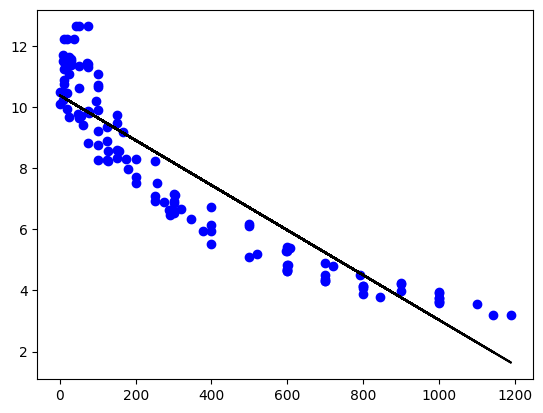

In [46]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b' )
plt.plot(X_test, y_pred,  color ='k')
plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.9490364629209762
MSE: 1.2332067882814794
RMSE: 1.1104984413683252


## Conclusion

#### Kesimpulan
Hence, we found that there is a negative correlation between the depth and the temperature where the deeper the depth is, the lower the temperature is. By using the 

#### Kesimpulan Pertanyaan 2:
Ada korelasi yang kuat antara kondisi cuaca dan jumlah peminjaman sepeda. Penyewa sepeda cenderung memilih untuk melakukan peminjaman saat cuaca cerah, diikuti oleh kondisi berawan atau berkabut. Sebaliknya, peminjaman sepeda cenderung rendah saat terjadi hujan ringan atau salju ringan.

#### Kesimpulan Pertanyaan 3:
Pola peminjaman sepeda bervariasi berdasarkan musimnya, dengan jumlah peminjaman terendah terjadi pada musim panas dan tertinggi pada musim gugur. Hal ini menunjukkan bahwa faktor-faktor selain musim juga memengaruhi jumlah peminjaman, karena bahkan selama musim dingin masih terdapat jumlah peminjaman yang signifikan.

#### Kesimpulan Pertanyaan 4:
Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda, yang terlihat dari pola persebaran data yang cenderung naik ke arah kanan atas pada grafik. Artinya, ketika suhu meningkat, jumlah peminjaman sepeda juga cenderung meningkat. Ini menunjukkan bahwa suhu memainkan peran penting dalam menentukan tingkat minat masyarakat untuk melakukan peminjaman sepeda.